# A communication scheme based on spline basis

## Data loading

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from seig import eig as eig


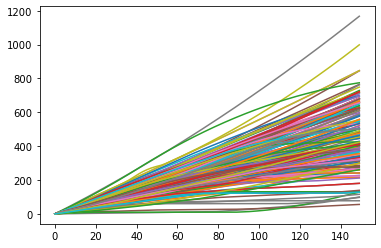

In [2]:
import numpy as np
import pickle 
from matplotlib import pyplot as plt 
trajectory_file = open("trajectories.pyo", "rb")
trajs = pickle.load(trajectory_file)
y_vec = np.array(trajs['y_vec'])
t_vec = np.array(trajs['t_vec'])
del trajs
trajectory_file.close()
del trajectory_file
for traj in range(y_vec.shape[0]):
    plt.plot(y_vec[traj])

In [41]:
import skfda

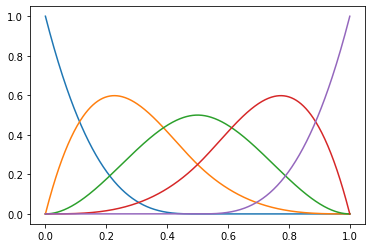

In [76]:
n_basis = 5
basis = skfda.representation.basis.BSpline(n_basis=n_basis)
basis.plot()

In [77]:
fdgry = skfda.FDataGrid(y_vec, t_vec)
fdgry_in_splines = fdgry.to_basis(basis)

In [78]:
y_coeffs = fdgry_in_splines.coefficients

In [79]:
friendly_basis = np.zeros((n_basis, t_vec.shape[0]))
for i in range(n_basis):
    friendly_basis[i,:] = fdgry_in_splines.basis.evaluate(t_vec)[i].reshape(-1)

## Reconstruction error

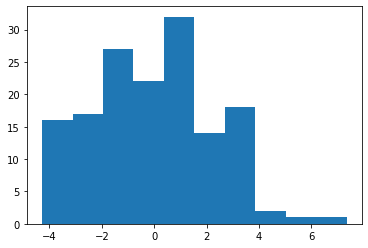

In [81]:
for i in range(1):
    y_r = y_coeffs[i] @ friendly_basis
    plt.hist(y_vec[i] - y_r)


## Visualization of coefficients

In [52]:
from mpl_toolkits import mplot3d

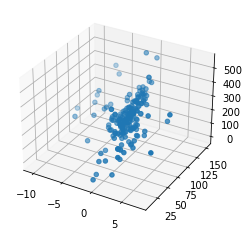

In [58]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(y_coeffs[:,0], y_coeffs[:,1], y_coeffs[:,2])

(array([12., 17., 42., 51., 29., 39.,  5.,  3.,  1.,  1.]),
 array([  57.1619324 ,  168.16878585,  279.1756393 ,  390.18249275,
         501.1893462 ,  612.19619966,  723.20305311,  834.20990656,
         945.21676001, 1056.22361346, 1167.23046691]),
 <BarContainer object of 10 artists>)

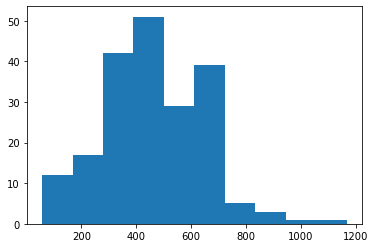

In [68]:
plt.hist(y_coeffs[:,4])